### Loading Data from the Server

Create a file called ".env" in the root directory of the repository.

Add the line: API_KEY=YOUR_ENTSO_API_KEY

In [3]:
import os
from entsoe import EntsoePandasClient
import pandas as pd
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.environ.get('API_KEY')

Using the EnsodePandaClient Library we load the Actual Total Load into the variable (df).

In [16]:
client = EntsoePandasClient(api_key=API_KEY)

start = pd.Timestamp('20211126', tz='Europe/Zurich')
end = pd.Timestamp('20211127', tz='Europe/Zurich')
country_code = 'CH'

df = client.query_load_and_forecast(country_code, start=start, end=end)

### Data Processing

Splitting the Actual Total Load into training and validation sets for Forecasted Load and Actual Load

<span style="color:#F08080">
<b>Most important part</b>

- Forecasted Load was chosen as a dummy series for covariates, it should be replaced by Temperature, other Wheater Data and Temporal Features

</span>

In [38]:
from sklearn.model_selection import train_test_split

# Actual and Forcasted Load from 20211126 to 20211127 (only one day)
actual_load = df["Actual Load"]

# Forecasted Load was chosen as a dummy series for covariates, it should be replaced by Temperature, other Wheater Data and Temporal Features
# I guess this means that Forecasted Load was also choosen as the independent variable
forcasted_load = df[["Forecasted Load","Forecasted Load"]]

# test_size = 1/8 => the training set is now 7/8 [21 hours] and the test set is now 1/8 [3 hours]
forcasted_training, forecasted_validation, actual_training, actual_validation = train_test_split(forcasted_load, actual_load, test_size=1 / 8, shuffle=False)

### Linear Regression Model

- doing a linear regression model with the forecasted training and actual training data sets
- predicting the actual total forcast 1/8 based on the forcasted_validation

MAPE: 1.133277111741641


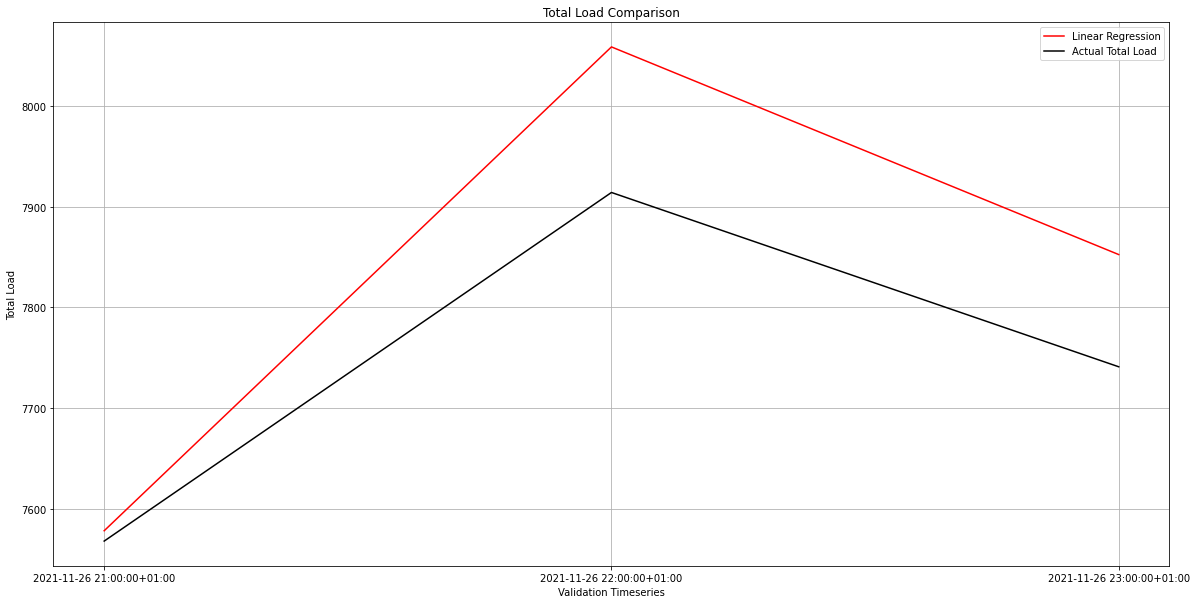

In [54]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

# Initialize Model [set it up for adding the data]
lr_model = linear_model.LinearRegression()

# Train the Linear Regression Model
lr_model.fit(forcasted_training, actual_training)

# Predict Datapoints
prediction_of_actual = lr_model.predict(forecasted_validation)

# Calculate MAPE and Plot Prediction
fig = plt.figure(figsize=[20, 10])
plt.plot(prediction_of_actual, color="red", label="Linear Regression")
plt.plot(actual_validation, color='black', label="Actual Total Load")
plt.xlabel('Validation Timeseries')
plt.ylabel('Total Load')
plt.title('Total Load Comparison')
plt.grid()
plt.legend()
MAPE = np.mean(np.abs((actual_validation - prediction_of_actual) / actual_validation)) * 100

print(f"MAPE: {MAPE}")

### Random Forest Regressor

MAPE: 2.3471065565496563


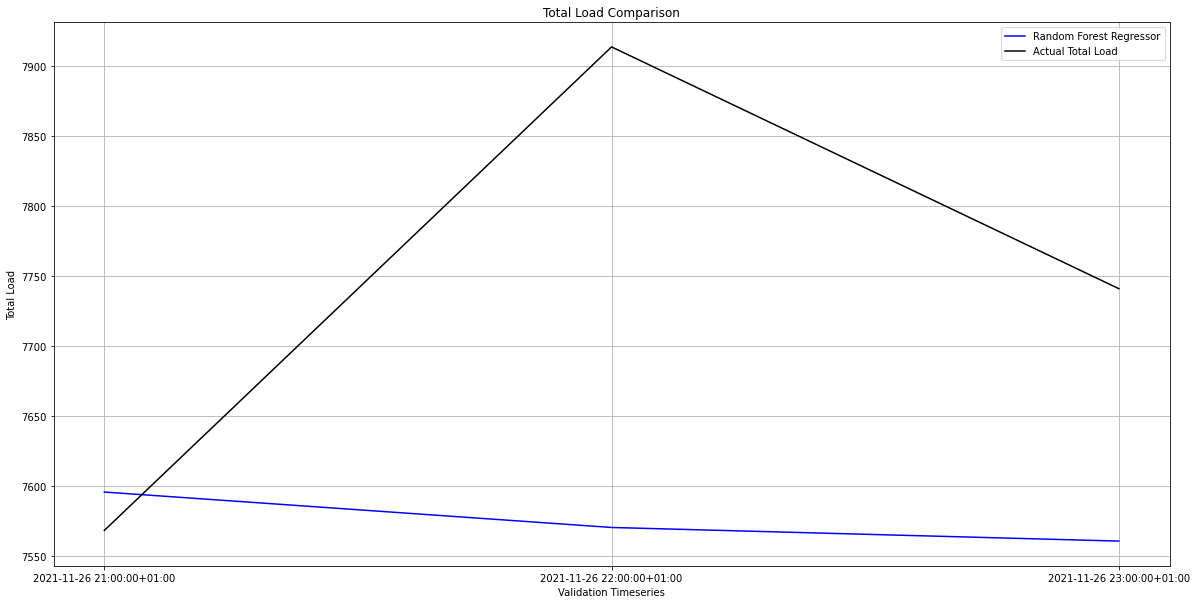

In [55]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(forcasted_training, actual_training)
prediction_of_actual = regr.predict(forecasted_validation)

# Calculate MAPE and Plot Prediction
fig = plt.figure(figsize=[20, 10])
plt.plot(prediction_of_actual, color="blue", label="Random Forest Regressor")
plt.plot(actual_validation, color='black', label="Actual Total Load")
plt.xlabel('Validation Timeseries')
plt.ylabel('Total Load')
plt.title('Total Load Comparison')
plt.grid()
plt.legend()
MAPE = np.mean(np.abs((actual_validation - prediction_of_actual) / actual_validation)) * 100

print(f"MAPE: {MAPE}")

### Support Vector Machines

MAPE: 2.533574423072147


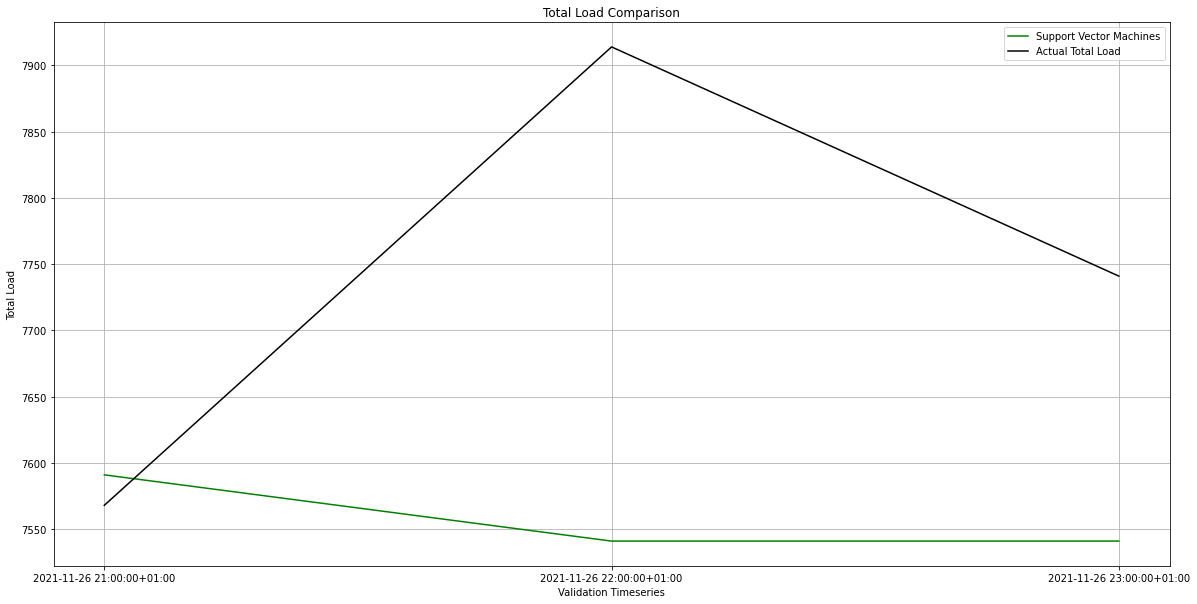

In [56]:
from sklearn import svm

clf = svm.SVC()
clf.fit(forcasted_training, actual_training)
prediction_of_actual = clf.predict(forecasted_validation)

# Calculate MAPE and Plot Prediction
fig = plt.figure(figsize=[20, 10])
plt.plot(prediction_of_actual, color="green", label="Support Vector Machines")
plt.plot(actual_validation, color='black', label="Actual Total Load")
plt.xlabel('Validation Timeseries')
plt.ylabel('Total Load')
plt.title('Total Load Comparison')
plt.grid()
plt.legend()
MAPE = np.mean(np.abs((actual_validation - prediction_of_actual) / actual_validation)) * 100

print(f"MAPE: {MAPE}")

### Lasso Regression

MAPE: 1.1332855419470023


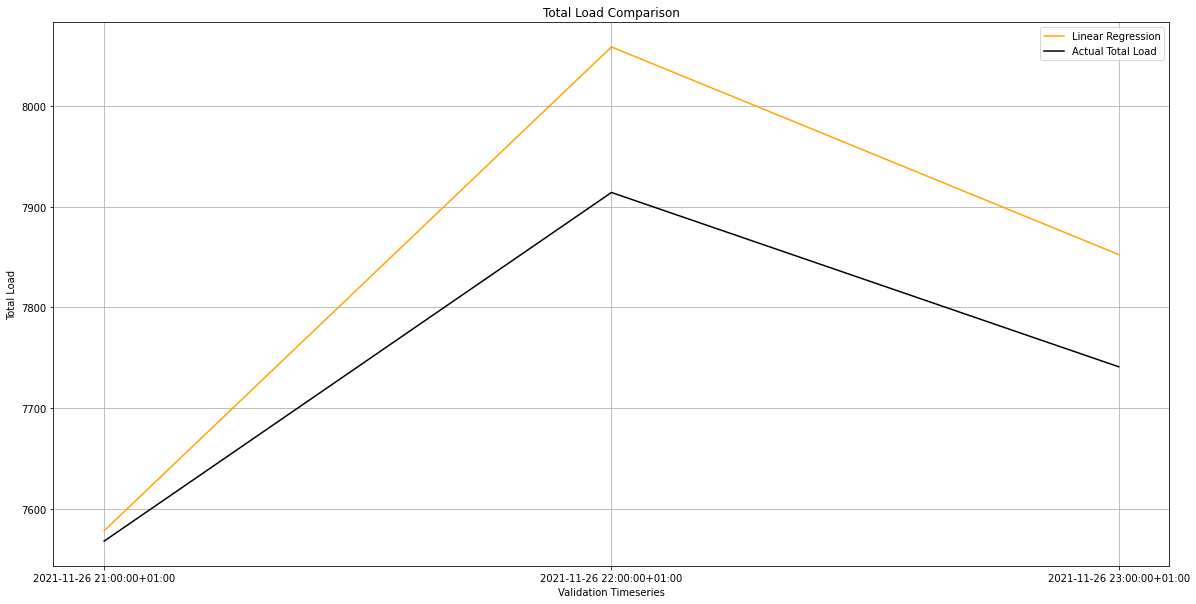

In [59]:
from sklearn import linear_model

# Initalized the model
lr_model = linear_model.Lasso(alpha=0.5)

# Train the Linear Regression Model
lr_model.fit(forcasted_training, actual_training)

# Predict Datapoints
prediction_of_actual = lr_model.predict(forecasted_validation)

# Calculate MAPE and Plot Prediction
fig = plt.figure(figsize=[20, 10])
plt.plot(prediction_of_actual, color="orange", label="Linear Regression")
plt.plot(actual_validation, color='black', label="Actual Total Load")
plt.xlabel('Validation Timeseries')
plt.ylabel('Total Load')
plt.title('Total Load Comparison')
plt.grid()
plt.legend()
MAPE = np.mean(np.abs((actual_validation - prediction_of_actual) / actual_validation)) * 100

print(f"MAPE: {MAPE}")